Adjust system level options using the ``options`` Setting object, which ca be used like a dictionary:

In [1]:
import aaanalysis as aa
print(aa.options)

{'verbose': 'off', 'random_state': 'off', 'allow_multiprocessing': True, 'name_tmd': 'TMD', 'name_jmd_n': 'JMD-N', 'name_jmd_c': 'JMD-C', 'ext_len': 0, 'jmd_n_len': None, 'jmd_c_len': None, 'df_scales': None, 'df_cat': None}


You can disable general model verbosity, such as progress updates from intensive algorithms or warnings, by setting``verbose=False``

In [2]:
aa.options["verbose"] = False

Change the random state of stochastic process such as clustering by setting ``random_state``:

In [3]:
aa.options["random_state"] = 42 # Set to 42 (otherwise not specified)

Adjust the names of the ``Part`` domains by the ``name_tmd``, ``name_jmd_n``, and ``name_jmd_c`` parameters

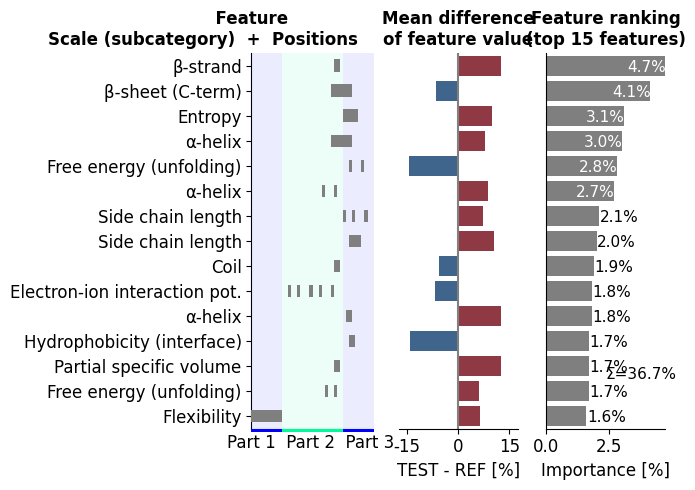

In [4]:
import matplotlib.pyplot as plt
aa.options["name_jmd_n"] = "Part 1"
aa.options["name_tmd"] = "Part 2"
aa.options["name_jmd_c"] = "Part 3"
df_feat = aa.load_features()
cpp_plot = aa.CPPPlot()
cpp_plot.ranking(df_feat=df_feat)
plt.tight_layout()
plt.show()

Adjust the length of the juxta middle domains (JMD) globally using the ``jmd_n_len`` and ``jmd_c_len``` parameters:

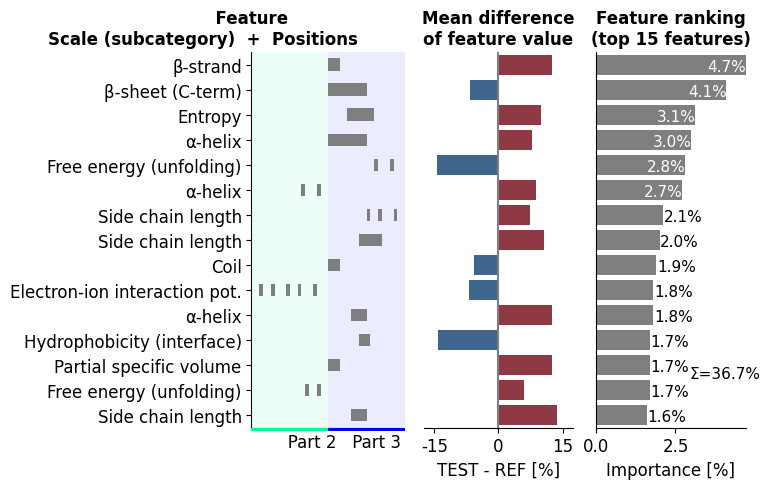

In [5]:
aa.options["jmd_n_len"] = 0
aa.options["jmd_c_len"] = 20
# Remove all features occurring in JMD-N
df_feat = df_feat[~df_feat["feature"].str.contains("JMD_N")]
cpp_plot.ranking(df_feat=df_feat)
plt.show()

Change default ``df_scales`` and ``df_cat`` DataFrame in case you want to use other scales or adjust your amino acid alphabet:

In [6]:
# Add average value for 'X'
nf = aa.NumericalFeature()
# Retrieve default scale from CPPPlot class
df_scales = aa.CPPPlot()._df_scales
aa.display_df(df_scales, n_cols=3, show_shape=True)

DataFrame shape: (20, 586)


,ANDN920101,ARGP820101,ARGP820102
AA,,,
A,0.494000,0.230000,0.355000
C,0.864000,0.404000,0.579000
D,1.000000,0.174000,0.000000
E,0.420000,0.177000,0.019000
F,0.877000,0.762000,0.601000
G,0.025000,0.026000,0.138000
H,0.840000,0.230000,0.082000
I,0.000000,0.838000,0.440000
K,0.506000,0.434000,0.003000


In [7]:
df_scales_new = nf.extend_alphabet(df_scales=df_scales, new_letter='X')
aa.options["df_scales"] = df_scales_new
# Retrieve new scale DataFrame from CPP plot object 
_df_scales_new = aa.CPPPlot()._df_scales
aa.display_df(_df_scales_new,  n_cols=3, row_to_show="X", show_shape=True)

DataFrame shape: (21, 586)


,ANDN920101,ARGP820101,ARGP820102
AA,,,
X,0.577300,0.376350,0.288650
